In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
sns.set(font='Arial')

from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.seasonal import STL
plt.rc("figure", figsize=(16, 10))

In [121]:
vac_rate = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='vac_hmi',engine='openpyxl')
vac_rate.index = pd.PeriodIndex(vac_rate.index,freq='A-DEC').to_timestamp(freq='A-DEC')

In [122]:
vac_rate=vac_rate/100

In [123]:
universe = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='universe',engine='openpyxl')
universe.index = pd.PeriodIndex(universe.index,freq='A-DEC').to_timestamp(freq='A-DEC')

In [124]:
rents = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='rents',engine='openpyxl')
rents.index = pd.PeriodIndex(rents.index,freq='A-DEC').to_timestamp(freq='A-DEC')


In [125]:
rents=rents.join(rents.pct_change(1),rsuffix = '_pct_diff')

In [126]:
universe['Vacant Units']=universe['TOTAL']*vac_rate['all_TOTAL']

In [127]:
universe['occupied_units'] = universe['TOTAL']-universe['Vacant Units']

In [128]:
universe['change_in_occupied']=universe['occupied_units'].diff(1)

In [83]:
nat_var = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='national',engine='openpyxl',index_col=0)
prov_var=pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='provincial',engine='openpyxl',index_col=0)
covid = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='covid_dummy',engine='openpyxl',index_col=0)
wti = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='wti',engine='openpyxl',index_col=0)


nat_var.index = nat_var.index.str.replace(' ','')
nat_var.index = nat_var.index.rename('Date')
nat_var.index = pd.PeriodIndex(nat_var.index,freq='Q').to_timestamp()

prov_var.index = prov_var.index.rename('Date')
prov_var.index = pd.PeriodIndex(prov_var.index,freq='Q').to_timestamp()


covid.index = covid.index.str.replace(' ','')
covid.index = covid.index.rename('Date')
covid.index = pd.PeriodIndex(covid.index,freq='Q').to_timestamp()

wti.index=wti.index.str.replace(' ','')
wti.index = wti.index.rename('Date')
wti.index = pd.PeriodIndex(wti.index,freq='Q').to_timestamp()

In [84]:
prov_var = prov_var.join(nat_var)
prov_var = prov_var.join(covid)
prov_var = prov_var.join(wti)

In [85]:
prov_var=prov_var.resample('A').mean()

In [220]:
m2_pop = pd.read_csv('m2_pop_est.csv',index_col=0)
m2_pop.index=m2_pop.index.rename('Date')
m2_pop.index = pd.PeriodIndex(m2_pop.index,freq='A-DEC').to_timestamp(freq='A-DEC')
m2_pop = m2_pop.add_prefix('m2_')
m2_pop=m2_pop.join(m2_pop.diff(1),rsuffix='_diff')

In [221]:
m3_pop = pd.read_csv('m3_pop_est.csv',index_col=0)
m3_pop.index=m3_pop.index.rename('Date')
m3_pop.index = pd.PeriodIndex(m3_pop.index,freq='A-DEC').to_timestamp(freq='A-DEC')
m3_pop = m3_pop.add_prefix('m3_')
m3_pop=m3_pop.join(m3_pop.diff(1),rsuffix='_diff')

In [86]:
multi_starts = pd.read_csv('..\\data\\pareto\\acasmmura_q.csv',index_col=0)
multi_starts.index=multi_starts.index.rename('Date')
multi_starts.index=pd.DatetimeIndex(multi_starts.index,freq='QS-OCT')

In [87]:
multi_fcast = pd.read_csv('multi_starts_fcast_23.csv',index_col=0)
multi_fcast.index=pd.DatetimeIndex(multi_fcast.index,freq='QS-OCT')
multi_fcast.columns=["ACASMMURA_Q"]

In [88]:
multi_starts = multi_starts*1000
multi_starts = multi_starts.append(multi_fcast['2023':])

In [89]:
multi_starts = multi_starts['1990':].resample('A').mean()

In [90]:
multi_starts

,ACASMMURA_Q
1990-12-31,1467.000000
1991-12-31,566.000000
1992-12-31,1038.750000
1993-12-31,1456.750000
1994-12-31,1649.750000
1995-12-31,1300.750000
1996-12-31,1211.250000
1997-12-31,2532.500000
1998-12-31,3316.500000
1999-12-31,4040.000000


In [140]:
prov_var

,gdp_AB_2023,gdp_AB_2023_alt,unemp_AB_2023,unemp_AB_2023_alt,emp_AB_2023,emp_AB_2023_alt,cpi_AB_2023,cpi_AB_2023_alt,cpiyoy_AB_2023,cpiyoy_AB_2023_alt,policy_rate_base,policy_rate_alt,"Interest rate, 10-Year Benchmark Bond Yield",5_year_mortgage_base,5_year_mortgage_alt,COVID-19,Long COVID,WTI_base,WTI_lower,WTI_upper
Date,,,,,,,,,,,,,,,,,,,,
1984-12-31,126076.999750,126076.999750,11.408333,11.408333,1.137151e+03,1.137151e+03,59.808011,59.808011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1985-12-31,135266.914000,135266.914000,9.775000,9.775000,1.172953e+03,1.172953e+03,61.590065,61.590065,0.029789,0.029789,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1986-12-31,131453.000000,131453.000000,10.008333,10.008333,1.183990e+03,1.183990e+03,63.682752,63.682752,0.033973,0.033973,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1987-12-31,133853.000000,133853.000000,9.525000,9.525000,1.188002e+03,1.188002e+03,66.249792,66.249792,0.040267,0.040267,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1988-12-31,144166.000250,144166.000250,7.983333,7.983333,1.222826e+03,1.222826e+03,68.051507,68.051507,0.027325,0.027325,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1989-12-31,146272.999750,146272.999750,7.158333,7.158333,1.251006e+03,1.251006e+03,70.909457,70.909457,0.041935,0.041935,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1990-12-31,149567.915500,149567.915500,6.916667,6.916667,1.275568e+03,1.275568e+03,74.983557,74.983557,0.057473,0.057473,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1991-12-31,150229.000000,150229.000000,8.250000,8.250000,1.283553e+03,1.283553e+03,79.355346,79.355346,0.058481,0.058481,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN
1992-12-31,151229.000000,151229.000000,9.458333,9.458333,1.280241e+03,1.280241e+03,80.552914,80.552914,0.015109,0.015109,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN


In [130]:
universe = universe.join(multi_starts)

In [139]:
universe

,BACHELOR,1 BEDROOM,2 BEDROOM,3 BEDROOM +,TOTAL,Change in Universe,Rental Completions,Vacant Units,occupied_units,change_in_occupied,ACASMMURA_Q
1990-12-31,1904,22500,25356,5500,55260,NaN,291,1160.460,54099.540,NaN,1467.00
1991-12-31,1905,22312,24978,5324,54519,-741.0,256,1962.684,52556.316,-1543.224,566.00
1992-12-31,2285,22877,25202,6041,56405,1886.0,138,3102.275,53302.725,746.409,1038.75
1993-12-31,2307,22698,24374,5568,54947,-1458.0,168,3241.873,51705.127,-1597.598,1456.75
1994-12-31,2420,23354,26410,5813,57997,3050.0,132,2957.847,55039.153,3334.026,1649.75
1995-12-31,2378,22747,24449,5428,55002,-2995.0,83,1980.072,53021.928,-2017.225,1300.75
1996-12-31,2361,22963,23744,5508,54576,-426.0,6,818.640,53757.360,735.432,1211.25
1997-12-31,2380,22776,23420,5163,53739,-837.0,28,268.695,53470.305,-287.055,2532.50
1998-12-31,2335,22254,22812,5123,52524,-1215.0,130,315.144,52208.856,-1261.449,3316.50
1999-12-31,2310,22169,22539,4751,51769,-755.0,267,1397.763,50371.237,-1837.619,4040.00


In [224]:
df = prov_var

In [152]:
sel_res = ardl_select_order(universe['Change in Universe']['1991':],6,universe[['ACASMMURA_Q']]['1991':],ic='aic',trend='c',maxorder=6)

In [153]:
res = sel_res.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:     Change in Universe   No. Observations:                   32
Model:                     ARDL(1, 0)   Log Likelihood                -268.585
Method:               Conditional MLE   S.D. of innovations           1401.235
Date:                Wed, 08 Mar 2023   AIC                            545.171
Time:                        00:57:06   BIC                            550.907
Sample:                    12-31-1992   HQIC                           547.041
                         - 12-31-2022                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1059.6948    609.409     -1.739      0.093   -2308.012     188.622
Change in Universe.L1     0.2460      0.195      1.260      0.218      -0.154       0.646
ACASMMURA_Q.L0            0.2006      0.102      1.964      0.059      -0.009       0.410
=========================================================================================
"""

In [225]:
df = df.join(multi_starts)
df = df.join(universe.drop(columns='ACASMMURA_Q'))

In [226]:
df=df.join(m2_pop)
df=df.join(m3_pop)

In [228]:
sel_res = ardl_select_order(df['Change in Universe']['1996':'2022'],4,df[['ACASMMURA_Q','5_year_mortgage_base','WTI_base']]['1996':'2022'],ic='aic',trend='n',maxorder=4)

In [229]:
res = sel_res.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:     Change in Universe   No. Observations:                   27
Model:                  ARDL(1, 0, 4)   Log Likelihood                -197.395
Method:               Conditional MLE   S.D. of innovations            479.709
Date:                Wed, 08 Mar 2023   AIC                            410.790
Time:                        12:43:34   BIC                            420.855
Sample:                    12-31-2000   HQIC                           413.688
                         - 12-31-2022                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Change in Universe.L1       0.7874      0.152      5.189      0.000       0.470       1.105
ACASMMURA_Q.L0              0.1626      0.055      2.942      0.008       0.047       0.278
5_year_mortgage_base.L0  -366.6861    274.650     -1.335      0.198    -941.536     208.164
5_year_mortgage_base.L1   436.5165    392.241      1.113      0.280    -384.454    1257.487
5_year_mortgage_base.L2  -345.0045    425.762     -0.810      0.428   -1236.135     546.126
5_year_mortgage_base.L3   846.9285    414.422      2.044      0.055     -20.467    1714.324
5_year_mortgage_base.L4  -721.4882    293.056     -2.462      0.024   -1334.861    -108.115
===========================================================================================
"""

<AxesSubplot:xlabel='Date'>

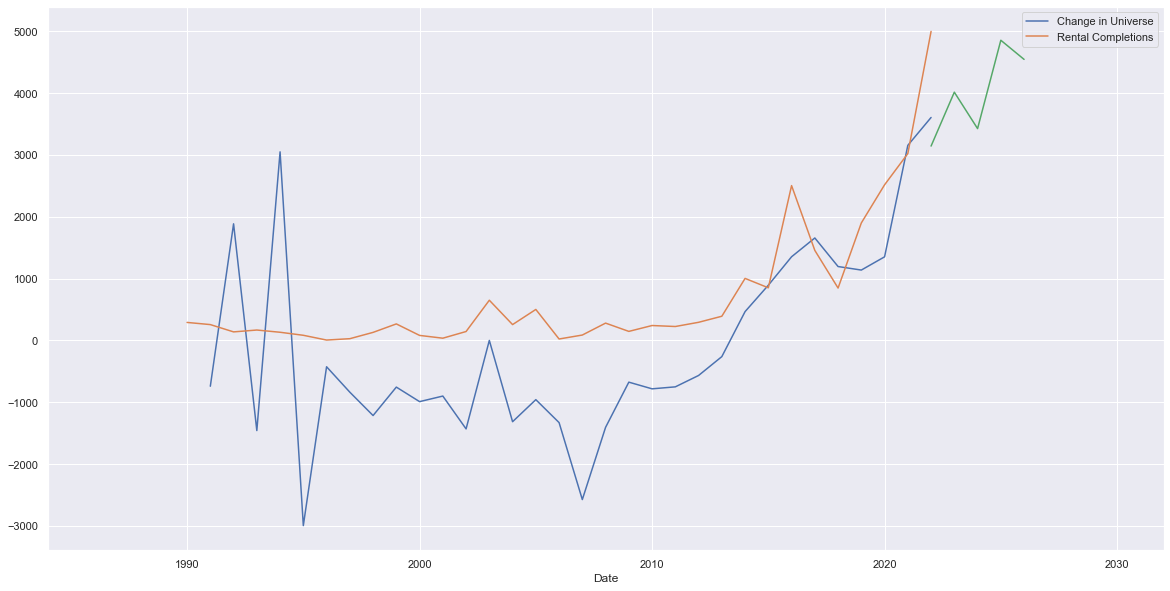

In [230]:
df['Change in Universe'].plot(figsize=(20,10),legend=True)
df['Rental Completions'].plot(legend=True)
res.predict(start=26,end=30, exog_oos=df[['ACASMMURA_Q','5_year_mortgage_base','WTI_base']]['2022':'2025']).plot()

In [231]:
res.predict(start=26,end=30, exog_oos=df[['ACASMMURA_Q','5_year_mortgage_base','WTI_base']]['2022':'2025'])

2022-12-31    3143.368293
2023-12-31    4015.102530
2024-12-31    3425.905060
2025-12-31    4854.995421
2026-12-31    4545.469402
Freq: A-DEC, dtype: float64

In [178]:
df[['ACASMMURA_Q','5_year_mortgage_base','WTI_base']]['2018':'2025']

,ACASMMURA_Q,5_year_mortgage_base,WTI_base
Date,,,
2018-12-31,7193.750000,4.375834,64.938333
2019-12-31,8358.500000,4.242500,56.984167
2020-12-31,5784.250000,3.718333,39.227500
2021-12-31,9494.000000,3.277500,67.987500
2022-12-31,11537.000000,4.909167,94.785000
2023-12-31,11215.578201,5.729983,74.224951
2024-12-31,9806.826085,5.556070,86.237270
2025-12-31,10089.903854,5.404750,92.170998


In [242]:
df['unemp_AB_2023']['1991':'2022']

Date
1991-12-31     8.250000
1992-12-31     9.458333
1993-12-31     9.583333
1994-12-31     8.783333
1995-12-31     7.841667
1996-12-31     6.883333
1997-12-31     5.875000
1998-12-31     5.583333
1999-12-31     5.666667
2000-12-31     4.966667
2001-12-31     4.725000
2002-12-31     5.341667
2003-12-31     5.116667
2004-12-31     4.591667
2005-12-31     3.941667
2006-12-31     3.458333
2007-12-31     3.566667
2008-12-31     3.691667
2009-12-31     6.575000
2010-12-31     6.516667
2011-12-31     5.433333
2012-12-31     4.700000
2013-12-31     4.658333
2014-12-31     4.775000
2015-12-31     6.091667
2016-12-31     8.133333
2017-12-31     7.883333
2018-12-31     6.725000
2019-12-31     7.025000
2020-12-31    11.558333
2021-12-31     8.662668
2022-12-31     5.800969
Freq: A-DEC, Name: unemp_AB_2023, dtype: float64

In [292]:
occ_sel_res = ardl_select_order(df['change_in_occupied']['1993':'2022'],4,df[['5_year_mortgage_base','m3_18 years and over_diff']]['1993':'2022'],ic='aic',trend='n',maxorder=4)

In [293]:
occ_res = occ_sel_res.model.fit()
occ_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:     change_in_occupied   No. Observations:                   30
Model:                  ARDL(4, 1, 3)   Log Likelihood                -212.290
Method:               Conditional MLE   S.D. of innovations            850.694
Date:                Wed, 08 Mar 2023   AIC                            446.580
Time:                        15:39:58   BIC                            460.419
Sample:                    12-31-1997   HQIC                           450.565
                         - 12-31-2022                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
change_in_occupied.L1            0.4138      0.236      1.754      0.099      -0.086       0.914
change_in_occupied.L2            0.0272      0.241      0.113      0.912      -0.484       0.539
change_in_occupied.L3            0.4143      0.185      2.237      0.040       0.022       0.807
change_in_occupied.L4            0.3133      0.178      1.759      0.098      -0.064       0.691
5_year_mortgage_base.L0        569.0589    441.406      1.289      0.216    -366.681    1504.799
5_year_mortgage_base.L1       -723.0754    425.613     -1.699      0.109   -1625.336     179.185
m3_18 years and over_diff.L0    -0.0027      0.018     -0.148      0.884      -0.042       0.036
m3_18 years and over_diff.L1    -0.0009      0.027     -0.033      0.974      -0.058       0.056
m3_18 years and over_diff.L2    -0.0290      0.029     -0.987      0.339      -0.091       0.033
m3_18 years and over_diff.L3     0.0537      0.020      2.703      0.016       0.012       0.096
================================================================================================
"""

<AxesSubplot:xlabel='Date'>

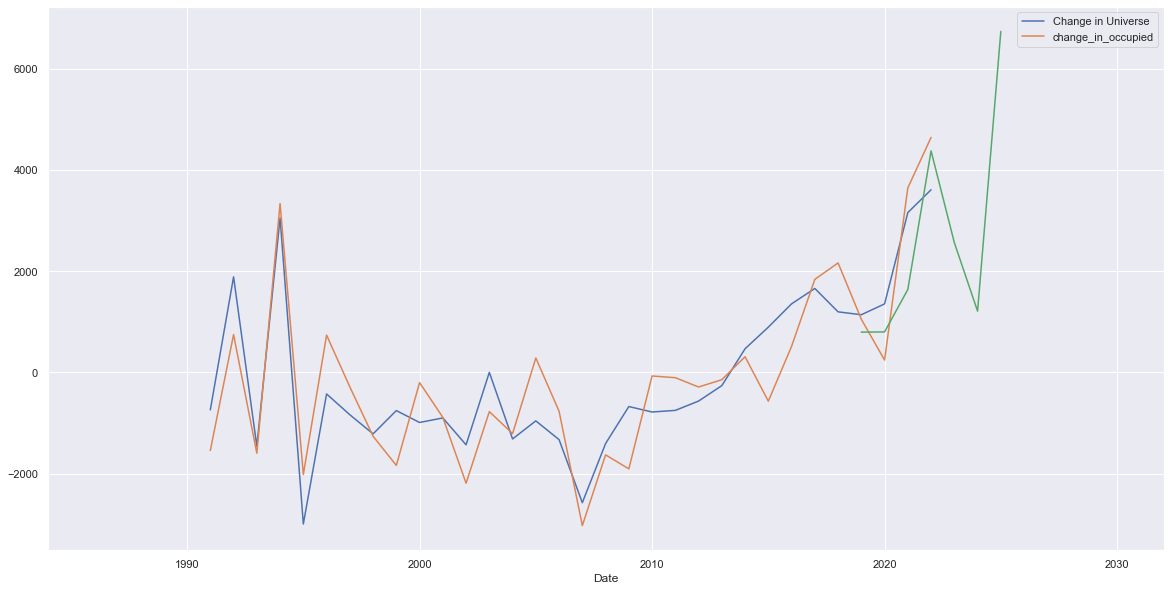

In [296]:
df['Change in Universe'].plot(figsize=(20,10),legend=True)
df['change_in_occupied'].plot(figsize=(20,10),legend=True)
occ_res.predict(start=26,end=32, exog_oos=df[['5_year_mortgage_base','m3_18 years and over_diff']]['2016':'2025']).plot()

In [297]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [300]:
val = np.array(df['change_in_occupied']['1993':'2022'].values,dtype=float)
exog =  np.array(df[['5_year_mortgage_base','m3_18 years and over_diff']]['1993':'2022'].values,dtype=float)
exog_fcast = np.array(df[['5_year_mortgage_base','m3_18 years and over_diff']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()


In [301]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -253.416
Date:                Wed, 08 Mar 2023   AIC                            514.832
Time:                        16:11:16   BIC                            520.301
Sample:                             0   HQIC                           516.544
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           274.2526    209.658      1.308      0.191    -136.669     685.174
x2            -0.0033      0.016     -0.205      0.837      -0.035       0.028
ar.L1         -0.5882      0.126     -4.678      0.000      -0.835      -0.342
sigma2      1.992e+06      0.024   8.19e+07      0.000    1.99e+06    1.99e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.89   Prob(JB):                         0.87
Heteroskedasticity (H):               1.11   Skew:                            -0.22
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.17e+24. Standard errors may be unstable.
"""

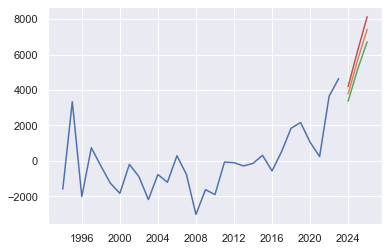

In [356]:
val = np.array(df['change_in_occupied']['1993':'2022'].values,dtype=float)
exog =  np.array(df[['m3_18 to 29 years_diff']]['1993':'2022'].values,dtype=float)
exog_fcast = np.array(df[['m3_18 to 29 years_diff']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(3,2,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(df['change_in_occupied']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])

In [350]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(3, 3, 0)   Log Likelihood                -243.092
Date:                Wed, 08 Mar 2023   AIC                            496.184
Time:                        17:07:14   BIC                            502.663
Sample:                             0   HQIC                           498.110
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0290      0.036     -0.805      0.421      -0.100       0.042
ar.L1         -1.3930      0.159     -8.747      0.000      -1.705      -1.081
ar.L2         -1.0115      0.298     -3.399      0.001      -1.595      -0.428
ar.L3         -0.3913      0.195     -2.005      0.045      -0.774      -0.009
sigma2      3.513e+06   9.57e+05      3.670      0.000    1.64e+06    5.39e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.92   Prob(JB):                         0.81
Heteroskedasticity (H):               2.24   Skew:                             0.30
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.88e+14. Standard errors may be unstable.
"""

c:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


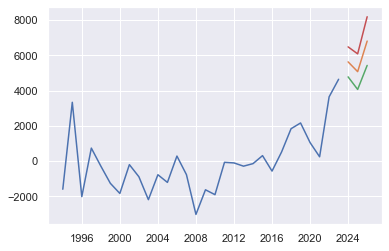

In [368]:
val = np.array(df['change_in_occupied']['1993':'2022'].values,dtype=float)
exog =  np.array(df[['m3_18 years and over_diff','unemp_AB_2023']]['1993':'2022'].values,dtype=float)
exog_fcast = np.array(df[['m3_18 years and over_diff','unemp_AB_2023']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(3,2,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(df['change_in_occupied']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [367]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -248.209
Date:                Wed, 08 Mar 2023   AIC                            508.418
Time:                        17:10:33   BIC                            516.412
Sample:                             0   HQIC                           510.862
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0174      0.016     -1.053      0.292      -0.050       0.015
x2          -108.3534    197.683     -0.548      0.584    -495.806     279.099
ar.L1         -1.3615      0.231     -5.902      0.000      -1.814      -0.909
ar.L2         -1.0243      0.296     -3.457      0.001      -1.605      -0.444
ar.L3         -0.6516      0.195     -3.350      0.001      -1.033      -0.270
sigma2      2.633e+06      0.010   2.62e+08      0.000    2.63e+06    2.63e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.82   Prob(JB):                         0.48
Heteroskedasticity (H):               0.83   Skew:                            -0.54
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+24. Standard errors may be unstable.
"""

In [370]:
fcast_res

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-12-31,5626.432186,1622.754546,4775.458870,6477.405502
2024-12-31,5072.030662,1925.288317,4062.408482,6081.652843
2025-12-31,6806.349088,2632.541601,5425.842923,8186.855253


In [372]:
df.columns

Index(['gdp_AB_2023', 'gdp_AB_2023_alt', 'unemp_AB_2023', 'unemp_AB_2023_alt',
       'emp_AB_2023', 'emp_AB_2023_alt', 'cpi_AB_2023', 'cpi_AB_2023_alt',
       'cpiyoy_AB_2023', 'cpiyoy_AB_2023_alt', 'policy_rate_base',
       'policy_rate_alt', 'Interest rate, 10-Year Benchmark Bond Yield',
       '5_year_mortgage_base', '5_year_mortgage_alt', 'COVID-19', 'Long COVID',
       'WTI_base', 'WTI_lower', 'WTI_upper', 'ACASMMURA_Q', 'BACHELOR',
       '1 BEDROOM', '2 BEDROOM', '3 BEDROOM +', 'TOTAL', 'Change in Universe',
       'Rental Completions', 'Vacant Units', 'occupied_units',
       'change_in_occupied', 'm2_All ages', 'm2_18 years and over',
       'm2_18 to 29 years', 'm2_All ages_diff', 'm2_18 years and over_diff',
       'm2_18 to 29 years_diff', 'm3_All ages', 'm3_18 years and over',
       'm3_18 to 29 years', 'm3_All ages_diff', 'm3_18 years and over_diff',
       'm3_18 to 29 years_diff'],
      dtype='object')

In [ ]:
val = np.array(df['change_in_occupied']['1993':'2022'].values,dtype=float)
exog =  np.array(df[['m3_18 years and over_diff','unemp_AB_2023']]['1993':'2022'].values,dtype=float)
exog_fcast = np.array(df[['m3_18 years and over_diff','unemp_AB_2023']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(3,2,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(df['change_in_occupied']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [374]:
vac_rate

,all_BACHELOR,all_1 BEDROOM,all_2 BEDROOM,all_3 BEDROOM +,all_TOTAL,apt_BACHELOR,apt_1 BEDROOM,apt_2 BEDROOM,apt_3 BEDROOM +,apt_TOTAL
1990-12-31,0.034,0.018,0.022,0.024,0.021,0.034,0.018,0.021,0.031,0.020
1991-12-31,0.039,0.035,0.039,0.028,0.036,0.040,0.035,0.041,0.026,0.037
1992-12-31,0.035,0.053,0.059,0.052,0.055,0.035,0.053,0.059,0.056,0.055
1993-12-31,0.078,0.055,0.063,0.048,0.059,0.078,0.055,0.061,0.057,0.059
1994-12-31,0.089,0.046,0.052,0.048,0.051,0.089,0.045,0.054,0.050,0.051
1995-12-31,0.045,0.033,0.039,0.032,0.036,0.045,0.032,0.040,0.030,0.036
1996-12-31,0.023,0.013,0.016,0.017,0.015,0.023,0.013,0.016,0.020,0.015
1997-12-31,0.009,0.005,0.005,0.004,0.005,0.009,0.005,0.005,0.004,0.005
1998-12-31,0.015,0.005,0.006,0.005,0.006,0.015,0.005,0.006,0.006,0.006
1999-12-31,NaN,0.029,0.022,0.019,0.027,NaN,0.030,0.022,0.017,0.028


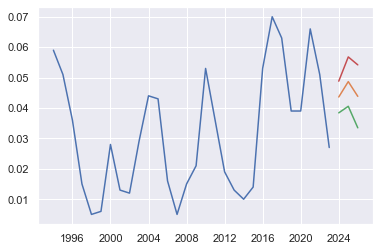

In [398]:
val = np.array(vac_rate['apt_TOTAL']['1996':'2022'].values,dtype=float)
exog =  np.array(df[['5_year_mortgage_base','unemp_AB_2023','WTI_base']]['1996':'2022'].values,dtype=float)
exog_fcast = np.array(df[['5_year_mortgage_base','unemp_AB_2023','WTI_base']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [399]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  83.354
Date:                Fri, 10 Mar 2023   AIC                           -156.708
Time:                        15:39:27   BIC                           -150.417
Sample:                             0   HQIC                          -154.896
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0005      0.005     -0.111      0.911      -0.010       0.009
x2             0.0056      0.002      2.448      0.014       0.001       0.010
x3            -0.0004      0.000     -2.501      0.012      -0.001   -8.75e-05
ar.L1          0.1950      0.254      0.769      0.442      -0.302       0.692
sigma2      9.866e-05   2.98e-05      3.315      0.001    4.03e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.72   Prob(JB):                         0.73
Heteroskedasticity (H):               0.36   Skew:                             0.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

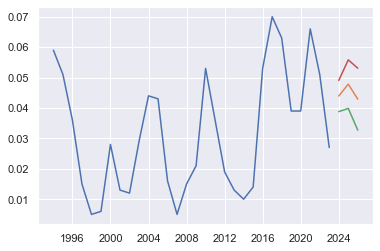

In [405]:
val = np.array(vac_rate['apt_TOTAL']['1996':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_base']]['1996':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_base']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [406]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  83.365
Date:                Fri, 10 Mar 2023   AIC                           -158.730
Time:                        15:40:53   BIC                           -153.697
Sample:                             0   HQIC                          -157.280
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0052      0.002      2.308      0.021       0.001       0.010
x2            -0.0004      0.000     -2.764      0.006      -0.001      -0.000
ar.L1          0.1944      0.240      0.811      0.417      -0.275       0.664
sigma2      9.553e-05   2.75e-05      3.471      0.001    4.16e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.71   Prob(JB):                         0.72
Heteroskedasticity (H):               0.33   Skew:                             0.36
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [407]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,0.043926,0.038800,0.049051
2024-12-31,0.047842,0.039858,0.055826
2025-12-31,0.042894,0.032714,0.053074


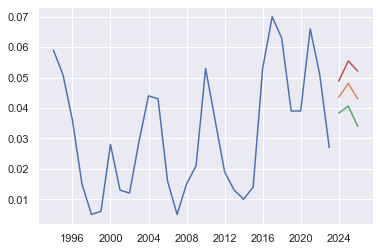

In [414]:
val = np.array(vac_rate['apt_TOTAL']['1996':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_base']]['1996':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_base']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(0,1,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [415]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  82.857
Date:                Fri, 10 Mar 2023   AIC                           -159.715
Time:                        15:42:40   BIC                           -155.941
Sample:                             0   HQIC                          -158.628
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0055      0.002      2.259      0.024       0.001       0.010
x2            -0.0004      0.000     -2.912      0.004      -0.001      -0.000
sigma2      9.999e-05   3.01e-05      3.319      0.001    4.09e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.38   Prob(JB):                         0.58
Heteroskedasticity (H):               0.38   Skew:                             0.43
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [416]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,0.043576,0.038332,0.048820
2024-12-31,0.048050,0.040634,0.055465
2025-12-31,0.043023,0.033941,0.052105


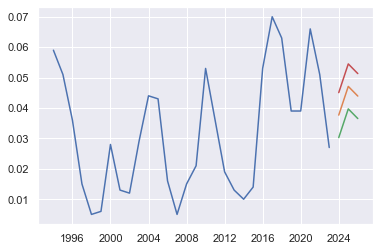

In [417]:
val = np.array(vac_rate['apt_TOTAL']['1996':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_base']]['1996':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_base']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(0,0,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [419]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                        SARIMAX   Log Likelihood                  76.774
Date:                Fri, 10 Mar 2023   AIC                           -147.547
Time:                        15:43:09   BIC                           -143.660
Sample:                             0   HQIC                          -146.391
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0060      0.001      6.268      0.000       0.004       0.008
x2         -7.564e-05      0.000     -0.546      0.585      -0.000       0.000
sigma2         0.0002   7.33e-05      2.713      0.007    5.52e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                  12.09   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               0.47   Skew:                            -0.04
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [420]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,0.037654,0.030260,0.045048
2024-12-31,0.047095,0.039701,0.054489
2025-12-31,0.043917,0.036524,0.051311


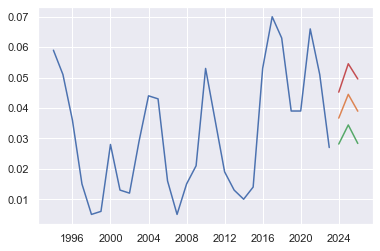

In [428]:
val = np.array(vac_rate['apt_TOTAL']['1996':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']]['1996':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']]['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,0,0), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [429]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,0.036669,0.028137,0.045201
2024-12-31,0.044478,0.034414,0.054543
2025-12-31,0.038943,0.028338,0.049548


In [430]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  85.472
Date:                Fri, 10 Mar 2023   AIC                           -162.945
Time:                        15:56:36   BIC                           -157.761
Sample:                             0   HQIC                          -161.404
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0069      0.001      9.405      0.000       0.005       0.008
x2            -0.0002      0.000     -1.948      0.051      -0.000    1.23e-06
ar.L1          0.6257      0.135      4.620      0.000       0.360       0.891
sigma2         0.0001   3.64e-05      2.823      0.005    3.14e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.10   Prob(JB):                         0.80
Heteroskedasticity (H):               0.49   Skew:                            -0.06
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

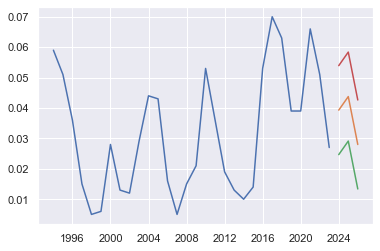

In [474]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(0,0,0), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [475]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:                        SARIMAX   Log Likelihood                  68.461
Date:                Fri, 10 Mar 2023   AIC                           -128.922
Time:                        17:03:00   BIC                           -123.890
Sample:                             0   HQIC                          -127.473
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0304      0.004      7.758      0.000       0.023       0.038
x1             0.0069      0.004      1.825      0.068      -0.001       0.014
x2          9.838e-05      0.000      0.281      0.778      -0.001       0.001
sigma2         0.0003      0.000      2.172      0.030    2.95e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.40   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               2.31   Skew:                             0.51
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


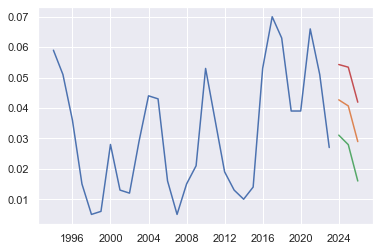

In [477]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,0,0), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [478]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  74.299
Date:                Fri, 10 Mar 2023   AIC                           -138.598
Time:                        17:03:08   BIC                           -132.307
Sample:                             0   HQIC                          -136.786
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0166      0.008      2.154      0.031       0.002       0.032
x1             0.0049      0.002      2.383      0.017       0.001       0.009
x2         -2.765e-05      0.000     -0.125      0.901      -0.000       0.000
ar.L1          0.4516      0.238      1.898      0.058      -0.015       0.918
sigma2         0.0002   8.87e-05      2.144      0.032    1.64e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   4.29   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.04   Prob(JB):                         0.41
Heteroskedasticity (H):               1.63   Skew:                             0.46
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

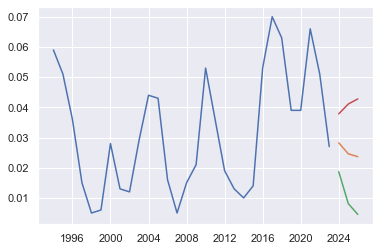

In [479]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,0,1), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [480]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  78.393
Date:                Fri, 10 Mar 2023   AIC                           -144.786
Time:                        17:03:23   BIC                           -137.237
Sample:                             0   HQIC                          -142.612
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0082      0.010      0.850      0.395      -0.011       0.027
x1             0.0017      0.001      1.201      0.230      -0.001       0.004
x2            -0.0002      0.000     -2.408      0.016      -0.000   -4.51e-05
ar.L1          0.7209      0.284      2.538      0.011       0.164       1.278
ma.L1          0.6814      0.267      2.549      0.011       0.157       1.205
sigma2         0.0001   5.63e-05      2.301      0.021    1.92e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.97   Prob(JB):                         0.85
Heteroskedasticity (H):               0.90   Skew:                            -0.16
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

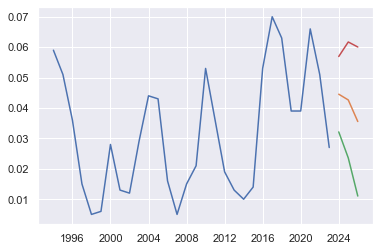

In [482]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,1), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [483]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  69.935
Date:                Fri, 10 Mar 2023   AIC                           -127.870
Time:                        17:03:41   BIC                           -120.557
Sample:                             0   HQIC                          -125.842
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.003      0.194      0.846      -0.005       0.007
x1             0.0037      0.002      1.901      0.057      -0.000       0.008
x2            -0.0001      0.000     -0.616      0.538      -0.000       0.000
ar.L1          0.4345      1.270      0.342      0.732      -2.055       2.924
ma.L1         -0.2664      1.220     -0.218      0.827      -2.658       2.126
sigma2         0.0002   9.37e-05      2.317      0.020    3.35e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.55   Prob(JB):                         0.79
Heteroskedasticity (H):               1.39   Skew:                            -0.15
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

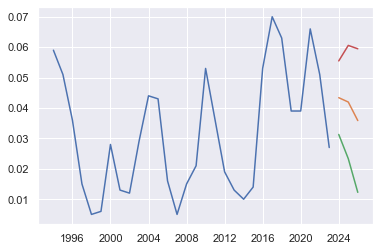

In [484]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,0), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [485]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  70.581
Date:                Fri, 10 Mar 2023   AIC                           -131.162
Time:                        17:05:17   BIC                           -125.068
Sample:                             0   HQIC                          -129.472
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.003      0.269      0.788      -0.006       0.007
x1             0.0036      0.002      1.839      0.066      -0.000       0.007
x2            -0.0001      0.000     -0.720      0.472      -0.000       0.000
ar.L1          0.1710      0.293      0.583      0.560      -0.404       0.746
sigma2         0.0002   7.68e-05      2.686      0.007    5.58e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.57   Prob(JB):                         0.80
Heteroskedasticity (H):               1.35   Skew:                            -0.15
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

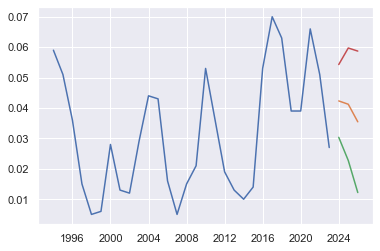

In [486]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(0,1,1), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [487]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  70.902
Date:                Fri, 10 Mar 2023   AIC                           -131.803
Time:                        17:05:30   BIC                           -125.709
Sample:                             0   HQIC                          -130.113
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.004      0.246      0.806      -0.006       0.008
x1             0.0034      0.002      1.772      0.076      -0.000       0.007
x2            -0.0001      0.000     -0.786      0.432      -0.000       0.000
ma.L1          0.1783      0.297      0.600      0.548      -0.404       0.761
sigma2         0.0002   7.26e-05      2.786      0.005    5.99e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.57   Prob(JB):                         0.81
Heteroskedasticity (H):               1.34   Skew:                            -0.15
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

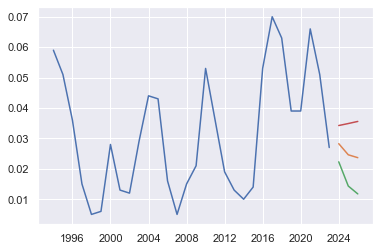

In [492]:
val = np.array(vac_rate['apt_TOTAL']['1997':'2022'].values,dtype=float)
exog =  np.array(df[['unemp_AB_2023','WTI_upper']].diff()['1997':'2022'].values,dtype=float)
exog_fcast = np.array(df[['unemp_AB_2023','WTI_upper']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,0,1), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(vac_rate['apt_TOTAL']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [493]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  78.393
Date:                Fri, 10 Mar 2023   AIC                           -144.786
Time:                        17:07:42   BIC                           -137.237
Sample:                             0   HQIC                          -142.612
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0082      0.010      0.850      0.395      -0.011       0.027
x1             0.0017      0.001      1.201      0.230      -0.001       0.004
x2            -0.0002      0.000     -2.408      0.016      -0.000   -4.51e-05
ar.L1          0.7209      0.284      2.538      0.011       0.164       1.278
ma.L1          0.6814      0.267      2.549      0.011       0.157       1.205
sigma2         0.0001   5.63e-05      2.301      0.021    1.92e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.97   Prob(JB):                         0.85
Heteroskedasticity (H):               0.90   Skew:                            -0.16
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [494]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,0.028262,0.022295,0.034229
2024-12-31,0.024607,0.014330,0.034884
2025-12-31,0.023661,0.011745,0.035577


In [502]:
vac_rate.append(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]).to_csv('vac_rate_fcast.csv')

In [506]:
vac_rate_tot = pd.concat([vac_rate_tot,fcast_res['mean_ci_lower']])

In [507]:
rents

,BACHELOR,1 BEDROOM,2 BEDROOM,3 BEDROOM +,TOTAL,BACHELOR_pct_diff,1 BEDROOM_pct_diff,2 BEDROOM_pct_diff,3 BEDROOM +_pct_diff,TOTAL_pct_diff
1990-12-31,349,456,584,591,515,NaN,NaN,NaN,NaN,NaN
1991-12-31,361,471,599,618,531,0.034384,0.032895,0.025685,0.045685,0.031068
1992-12-31,371,476,598,616,532,0.027701,0.010616,-0.001669,-0.003236,0.001883
1993-12-31,358,470,584,597,520,-0.035040,-0.012605,-0.023411,-0.030844,-0.022556
1994-12-31,352,466,585,589,519,-0.016760,-0.008511,0.001712,-0.013400,-0.001923
1995-12-31,355,464,584,597,517,0.008523,-0.004292,-0.001709,0.013582,-0.003854
1996-12-31,367,473,595,602,525,0.033803,0.019397,0.018836,0.008375,0.015474
1997-12-31,387,511,635,630,561,0.054496,0.080338,0.067227,0.046512,0.068571
1998-12-31,431,574,707,682,628,0.113695,0.123288,0.113386,0.082540,0.119430
1999-12-31,453,600,739,704,657,0.051044,0.045296,0.045262,0.032258,0.046178


In [511]:
vac_rate_tot.name = 'apt_TOTAL'

In [513]:
df = df.join(vac_rate_tot)

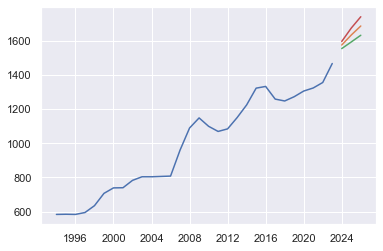

In [528]:
val = np.array(rents['2 BEDROOM']['1991':'2022'].values,dtype=float)
exog =  np.array(df[['apt_TOTAL']]['1991':'2022'].values,dtype=float)
exog_fcast = np.array(df[['apt_TOTAL']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,1,1), seasonal_order=(0,0,0,0),exog=exog, trend='t')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(rents['2 BEDROOM']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [529]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -158.488
Date:                Fri, 10 Mar 2023   AIC                            326.976
Time:                        17:21:35   BIC                            334.146
Sample:                             0   HQIC                           329.313
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          1.5223      1.059      1.438      0.151      -0.553       3.598
x1          -587.6572    703.528     -0.835      0.404   -1966.547     791.233
ar.L1          0.0712      0.520      0.137      0.891      -0.948       1.091
ma.L1          0.5923      0.403      1.469      0.142      -0.198       1.383
sigma2      1588.9470    366.353      4.337      0.000     870.908    2306.986
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.45
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             0.99
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [530]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']]

y,mean,mean_ci_lower,mean_ci_upper
2023-12-31,1574.095272,1553.191830,1594.998715
2024-12-31,1632.615266,1592.043895,1673.186637
2025-12-31,1685.242297,1631.161380,1739.323215


In [533]:
rent_fcast = pd.concat([rents['2 BEDROOM']['1993':'2022'],fcast_res[['mean','mean_ci_lower','mean_ci_upper']]])

In [535]:
rent_fcast.to_csv('rent_fcast_23.csv')

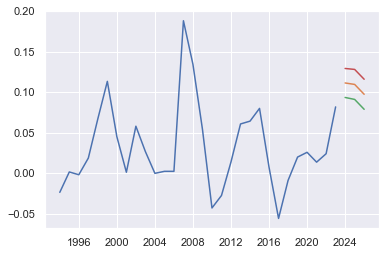

In [545]:
val = np.array(rents['2 BEDROOM_pct_diff']['1991':'2022'].values,dtype=float)
exog =  np.array(df[['apt_TOTAL']]['1991':'2022'].values,dtype=float)
exog_fcast = np.array(df[['apt_TOTAL']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(1,0,0), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(rents['2 BEDROOM_pct_diff']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [546]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  62.680
Date:                Fri, 10 Mar 2023   AIC                           -117.360
Time:                        17:32:48   BIC                           -111.497
Sample:                             0   HQIC                          -115.416
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0676      0.017      4.073      0.000       0.035       0.100
x1            -1.8722      0.416     -4.505      0.000      -2.687      -1.058
ar.L1          0.2646      0.187      1.414      0.157      -0.102       0.631
sigma2         0.0012      0.000      4.534      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                19.37
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.04
Prob(H) (two-sided):                  0.35   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [547]:
fcast_res

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-12-31,0.111421,0.034083,0.093548,0.129294
2024-12-31,0.109625,0.035255,0.091137,0.128113
2025-12-31,0.097465,0.035336,0.078935,0.115995


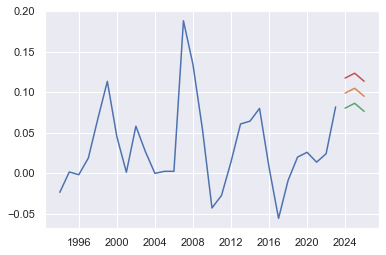

In [559]:
val = np.array(rents['2 BEDROOM_pct_diff']['1991':'2022'].values,dtype=float)
exog =  np.array(df[['apt_TOTAL']]['1991':'2022'].values,dtype=float)
exog_fcast = np.array(df[['apt_TOTAL']].diff()['2023':'2025'].values,dtype=float)
model = SARIMAX(val,order=(0,0,0), seasonal_order=(0,0,0,0),exog=exog, trend='c')
model_fit=model.fit()
f_cast = model_fit.get_forecast(3,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.6)
fcast_res.index= pd.date_range(start='2023',periods=3,freq='A-DEC')

plt.plot(rents['2 BEDROOM_pct_diff']['1993':'2022'])
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])


In [560]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                  61.542
Date:                Fri, 10 Mar 2023   AIC                           -117.085
Time:                        17:37:11   BIC                           -112.687
Sample:                             0   HQIC                          -115.627
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0903      0.011      8.150      0.000       0.069       0.112
x1            -1.8376      0.385     -4.770      0.000      -2.593      -1.083
sigma2         0.0013      0.000      4.323      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):                 4.66
Prob(Q):                              0.12   Prob(JB):                         0.10
Heteroskedasticity (H):               0.67   Skew:                             0.70
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [563]:
rent_diff = pd.concat([rents['2 BEDROOM_pct_diff']['1993':'2022'],fcast_res[['mean','mean_ci_lower','mean_ci_upper']]])

In [565]:
rent_diff.to_csv('rent_diff_fcast_23.csv')